# Egyptian league market values over the years
## Contents:
- [Dataset Overview](#Dataset-overview)
- [Total Market Value of Top 10 Clubs](#Total-Market-Value-of-Top-10-Clubs)
- [Foreign Players in League](#Foreign-Players-in-League)

# Dataset Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('egyptian_league_market_values.csv')

In [3]:
df.head()

,Club,Squad Size,Avg Age,Foreigners,Avg Market Value (EUR),Total Market Value (EUR),Team URL,Year
0,Al Ahly FC,34,23.9,4,NaN,NaN,https://www.transfermarkt.com/el-ahly-kairo/st...,2000
1,Zamalek SC,29,26.3,0,NaN,NaN,https://www.transfermarkt.com/zamalek-sc/start...,2000
2,El Mokawloon SC,23,25.0,0,NaN,NaN,https://www.transfermarkt.com/el-mokawloon-sc/...,2000
3,Ismaily SC,28,25.2,3,NaN,NaN,https://www.transfermarkt.com/ismaily-sc/start...,2000
4,Ittihad Alexandria SC,28,25.6,2,NaN,NaN,https://www.transfermarkt.com/ittihad-alexandr...,2000


In [4]:
df.tail()

,Club,Squad Size,Avg Age,Foreigners,Avg Market Value (EUR),Total Market Value (EUR),Team URL,Year
382,Enppi SC,43,24.5,4,137000.0,5.90,https://www.transfermarkt.com/enppi-sc/startse...,2023
383,Ismaily SC,56,24.8,4,100000.0,5.58,https://www.transfermarkt.com/ismaily-sc/start...,2023
384,Baladiyat El Mahalla,52,25.5,11,94000.0,4.90,https://www.transfermarkt.com/baladiya-mahalla...,2023
385,El Gouna FC,43,25.5,9,111000.0,4.78,https://www.transfermarkt.com/el-gouna-fc/star...,2023
386,El Dakhlia SC,55,25.7,7,78000.0,4.30,https://www.transfermarkt.com/el-dakhlia-sc/st...,2023


In [5]:
df.shape

(387, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Club                      387 non-null    object 
 1   Squad Size                387 non-null    int64  
 2   Avg Age                   387 non-null    float64
 3   Foreigners                387 non-null    int64  
 4   Avg Market Value (EUR)    306 non-null    float64
 5   Total Market Value (EUR)  306 non-null    float64
 6   Team URL                  387 non-null    object 
 7   Year                      387 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 24.3+ KB


In [7]:
df.describe()

,Squad Size,Avg Age,Foreigners,Avg Market Value (EUR),Total Market Value (EUR),Year
count,387.000000,387.000000,387.000000,306.000000,306.000000,387.000000
mean,34.612403,26.514212,3.762274,171385.624216,36362.929673,2011.687339
std,7.470470,1.153000,2.247698,149054.772093,131896.788467,6.551345
min,17.000000,23.300000,0.000000,1.010000,1.050000,2000.000000
25%,29.000000,25.800000,2.000000,84000.000000,3.450000,2006.000000
50%,34.000000,26.400000,3.000000,135000.000000,5.415000,2012.000000
75%,39.000000,27.200000,5.000000,183000.000000,9.167500,2017.000000
max,59.000000,29.900000,13.000000,678000.000000,750000.000000,2023.000000


In [8]:
df.isnull().sum()

Club                         0
Squad Size                   0
Avg Age                      0
Foreigners                   0
Avg Market Value (EUR)      81
Total Market Value (EUR)    81
Team URL                     0
Year                         0
dtype: int64

In [9]:
df['Club'].value_counts().head(15)

Club
Al Ahly FC               23
Zamalek SC               23
Ismaily SC               23
Ittihad Alexandria SC    23
El Masry SC              22
El Mokawloon SC          21
Enppi SC                 21
Tala'ea El Gaish         19
Ghazl El Mahalla         16
Harras El Hodoud         16
Petrojet                 13
Smouha SC                13
Masr El Makasa           12
Entag El Harby           11
El Gouna FC              11
Name: count, dtype: int64

In [10]:
# Load and clean market value column
def fix_market_value(value):
    try:
        value = float(value)
    except:
        return None
    # If value is less than 1000, assume it's in millions and convert to actual value
    return value * 1_000_000 if 0 < value < 1000 else value

In [11]:
# Drop rows with missing market value and apply correction
df = df.dropna(subset=["Total Market Value (EUR)"])
df["Fixed Avg Market Value (EUR)"] = df["Avg Market Value (EUR)"].apply(fix_market_value)
df["Fixed Total Market Value (EUR)"] = df["Total Market Value (EUR)"].apply(fix_market_value)
df_clean = df.dropna(subset=["Fixed Total Market Value (EUR)"])

## Total Market Value of Top 10 Clubs

In [12]:
# Get top 10 most frequent clubs
top_clubs = df_clean["Club"].value_counts().head(10).index.tolist()
df_top10 = df_clean[df_clean["Club"].isin(top_clubs)]

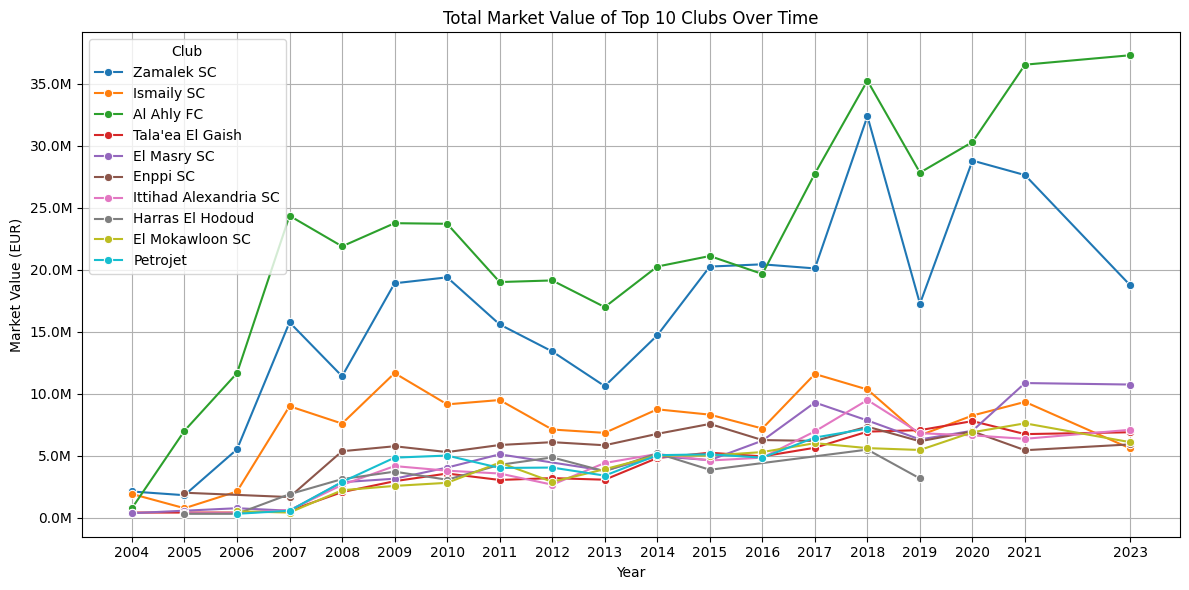

In [13]:
# Plot fixed total market value over time for top 10 clubs
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top10,
    x="Year",
    y="Fixed Total Market Value (EUR)",
    hue="Club",
    marker="o")

plt.title("Total Market Value of Top 10 Clubs Over Time")
plt.ylabel("Market Value (EUR)")
plt.xlabel("Year")
plt.xticks(sorted(df_top10["Year"].unique()))  # Show all years on the x-axis
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))  # Show y-axis in millions with "M"
plt.grid(True)
plt.tight_layout()
plt.show()

## Foreign Players in League

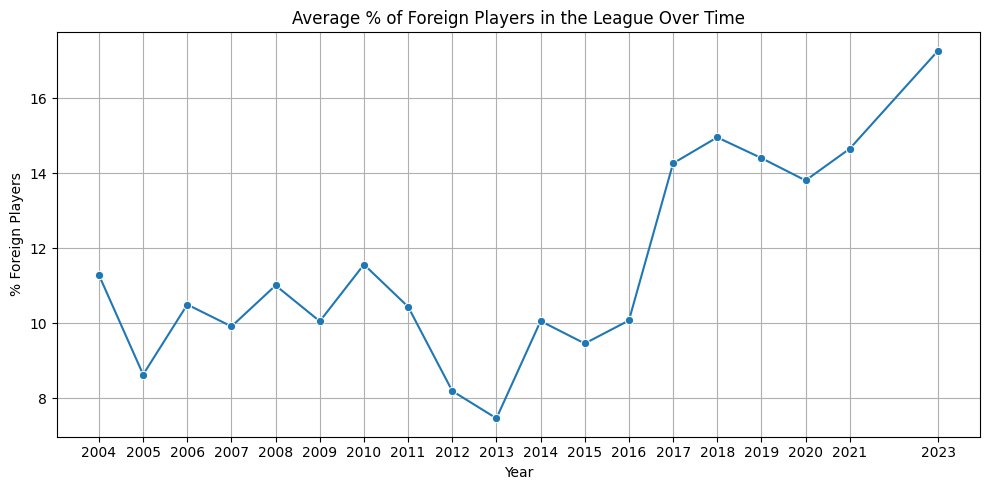

In [14]:
# Fill missing values if needed
df_clean['Foreigners'] = df_clean['Foreigners'].fillna(0)
df_clean['Squad Size'] = df_clean['Squad Size'].replace(0, pd.NA)  # Avoid division by 0

# Calculate % of foreign players per club
df_clean['Foreigners %'] = df_clean['Foreigners'] / df['Squad Size'] * 100

# League-wide trend over time
foreign_trend = df_clean.groupby('Year')['Foreigners %'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=foreign_trend, x='Year', y='Foreigners %', marker='o')
plt.title('Average % of Foreign Players in the League Over Time')
plt.ylabel('% Foreign Players')
plt.xticks(sorted(df_top10["Year"].unique()))  # Show all years on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()

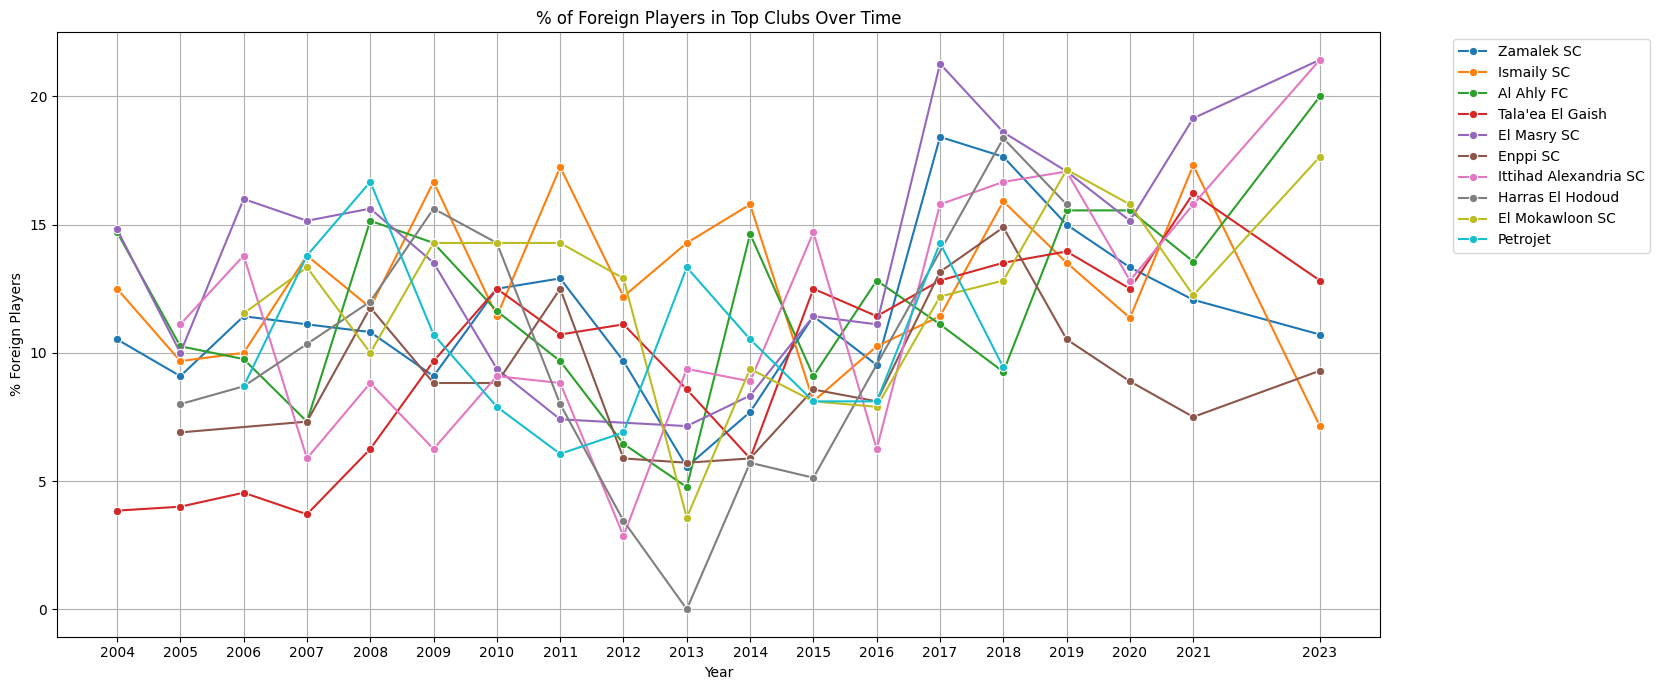

In [15]:
# Plot 2: Foreign % per club over time
top_clubs = df_clean['Club'].value_counts().head(10).index
df_top = df_clean[df_clean['Club'].isin(top_clubs)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top, x='Year', y='Foreigners %', hue='Club', marker='o')
plt.title('% of Foreign Players in Top Clubs Over Time')
plt.ylabel('% Foreign Players')
plt.xticks(sorted(df_top10["Year"].unique()))  # Show all years on the x-axis
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()